In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Random Walk

A random walk is an example of a **stochastic process**, an equation that depends on random variables:

$$X_t = X_{t-1} + W_t,$$

Your random variable at time $t$ is dependent on your previous position at $t-1$ and a random term $W_t$. 

Where $$W_t = \mu + \sigma Z_t, \quad Z_t\sim\mathcal{N}(0, 1).$$ and $\mu$ is the expected return (drift term) and $\sigma$ is the standard deviation. 

Stock prices move very much like **Geometric Brownian Motion**: 

$$\Delta S_k =  \mu S_k\Delta t + \sigma S_k \Delta Z_k = S_k \left(\mu \Delta t + \sigma \Delta Z_k\right).$$

$$S_{k+1} =  S_k + S_k \left(\mu \Delta t + \sigma \Delta Z_k\right).$$

Try solving this with calculus.

Now let's simulate a random walk for $T = 252$ days with an initial price of $\$10$, $\mu$ of $25$ percent per year, and $\sigma = 0.2$ (20 percent volatility).

Text(0, 0.5, 'Price')

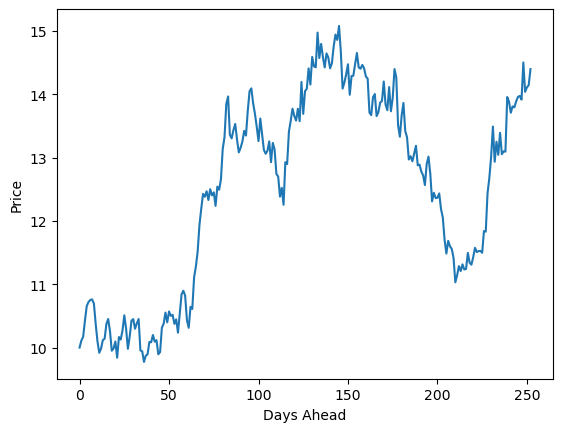

In [2]:
T = 252
S0 = 10
mu = .25/T
sigma = .02

S_pos = [S0]

# Volatility is assumed constant. Is this good or bad?
# When is this a good model? When is it bad?
Z = np.random.normal(0,1, size = T) #random.normal takes mean and standard deviation, NOT variance!

for t in range(0, T):
    S_pos.append(S_pos[t] + S_pos[t]*(mu + sigma*Z[t]))
    
plt.plot(S_pos)
plt.xlabel('Days Ahead') # Steps
plt.ylabel('Price')

Play around with $\mu$ and $\sigma$ and see what happens.

## 2D Random Walk Example

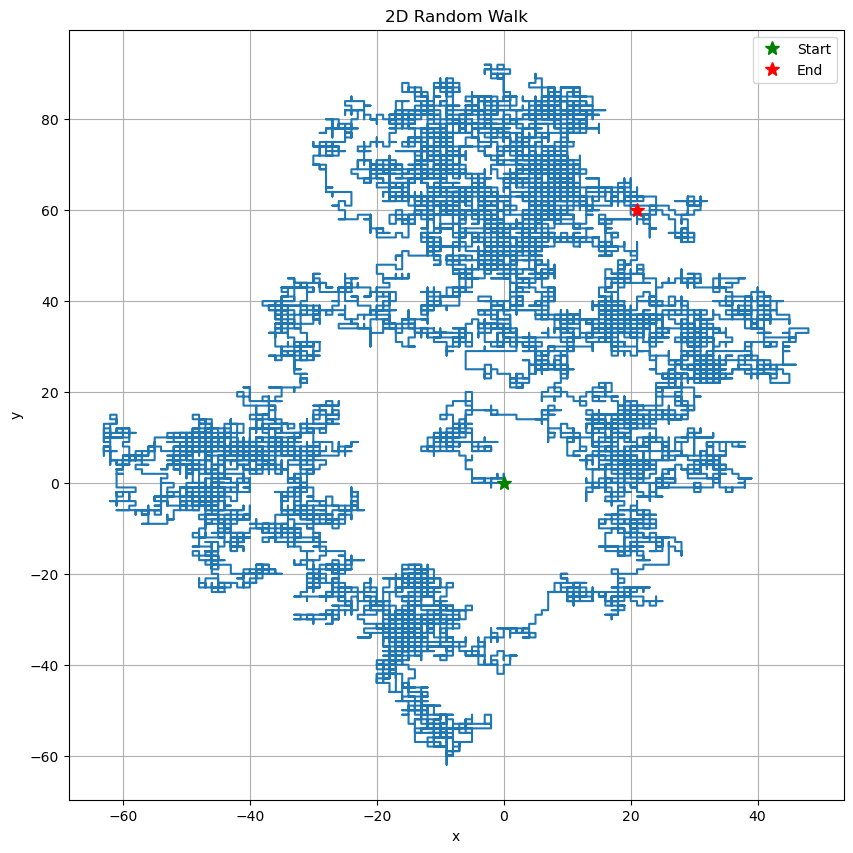

In [3]:
import random

steps = 20000     

x = np.zeros(steps)
y = np.zeros(steps)
for i in range(1, steps):
    (dx, dy) = random.choice([(1,0),(-1,0),(0,1),(0,-1)])
    x[i] = x[i-1] + dx 
    y[i] = y[i-1] + dy
        
plt.figure(figsize = (10,10))
plt.grid()
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Random Walk")

plt.plot(0,0, 'g*', markersize=10, label='Start')
plt.plot(x[-1],y[-1], 'r*', markersize=10, label='End')
plt.legend()

# Try these problems out:

1a. Using Monte Carlo Simulations, simulate 1,000 1D random walks with 200 steps each. Assume that at each iterations there is an equal probability of going left or right.

1b. Plot a histogram to check the distribution of the ending points. One way to do it is to use np.random.choice, and to get the last element of a list, do `list_1[-1]`.

2. Try simulating 2D random walks. What is an approximation to P(return to origin)? Use Monte Carlo methods.

### Now back to finance, doing something similar.

In finance, the log of the stock price $\log(S_t)$ is a "random walk":

$$\log(S_t) = \log(S_{t-1}) + W_t$$ 

Ignore the logs for now, we will focus on geometric brownian motion: 
$\Delta S_k =  \mu S_k\Delta t + \sigma S_k \Delta Z_k = S_k \left(\mu \Delta t + \sigma \Delta Z_k\right).$


3. Create 5,000 random walkers with the same initial conditions. You get to pick the initial parameters (starting price, volatility, etc.). Plot a histogram to check the distribution of their ending points, you can normalize if you want.

4. Try again with log prices.